In [46]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Turn in an image (e.g., screenshot) or PDF copy of any code that is part of your answer. Make sure all images and PDF pages are properly rotated. Make sure that all pages are clearly visible. 

Tips: Use the document scanner function on your smart phone to take better page "scans" using your camera. Make sure your screen is not shifted toward warmer colours (some devices filter blue light at night) giving it a dim and orange appearance. 

# Question 1
# A
Consider the function $f(x)=x^3 -9x^2 +11x-11$, which has a root in the interval $(-10,10)$. Calculate by hand the first 3 iterations of Newton's method to estimate the root of $f(x)$, using the initial guess $x_0=0$. What happens? 

# B
Write a python code that uses bisection to determine a better choice of $x_0$, then feed this new initial guess to a Newton's method solver. Iterate your Newton's method solver until you have found the root of $f(x)$ to within a tolerance of $\epsilon=10^{-6}$, and report the value of the root.

In [79]:
def f(x):
    return x**3-9*x**2+11*x-11
def bisction(xLeft,xRight,N):
    ctr=1
    
    if(xLeft)>0 and f(xRight)<0:
        condition=1
    elif f(xLeft)<0 and f(xRight)>0:
        condition=1
    else:
        condition=0
        
    while condition:
        xNew=(xLeft+xRight)/2
        if f(xNew)>0and f(xLeft)<0:
            xRight=xNew
        elif f(xNew)<0and f(xRight)>0:
            xLeft=xNew
        ctr=ctr+1
        if ctr>N:
            doFlag=0
            return xNew
           
    
x0=bisction(f(-10),f(10),100)
print(x0)
e=1e-6
def g(x):
    return 3*x**2-18*x+11
def newton(xCurr,eps):
    condition=True
    while condition:
        xNew=xCurr-f(xCurr)/g(xCurr)
        xCurr=xNew
        condition=abs(f(xCurr))>eps
    return xCurr
xRoot=newton(x0,e)  
print(xRoot)

7.765951535812475
7.7659515358124755


# Question 2
# A
Derive a third order method for solving $f(x) = 0$ in a way similar to the derivation of Newton’s method, using evaluations of $f(x_n)$, $f’(x_n)$, and $f’’(x_n)$. Show that in the course of derivation, a quadratic equation arises, and therefore two distinct schemes can be derived. **Hint: Expand $f(x)$ around $x_n$.**



# B 
Show that the order of convergence (under appropriate conditions) is cubic.


# C 
Implement the root-finding method in Python to compute the root of $f(x) = x^3 - 2$. Add a stopping criterion that requires $\vert f(x_n) \vert \leq 10^{-8}$. Save the value of $x_n$ at each iteration and create a plot showing the convergence rate.

1.2599210500177698


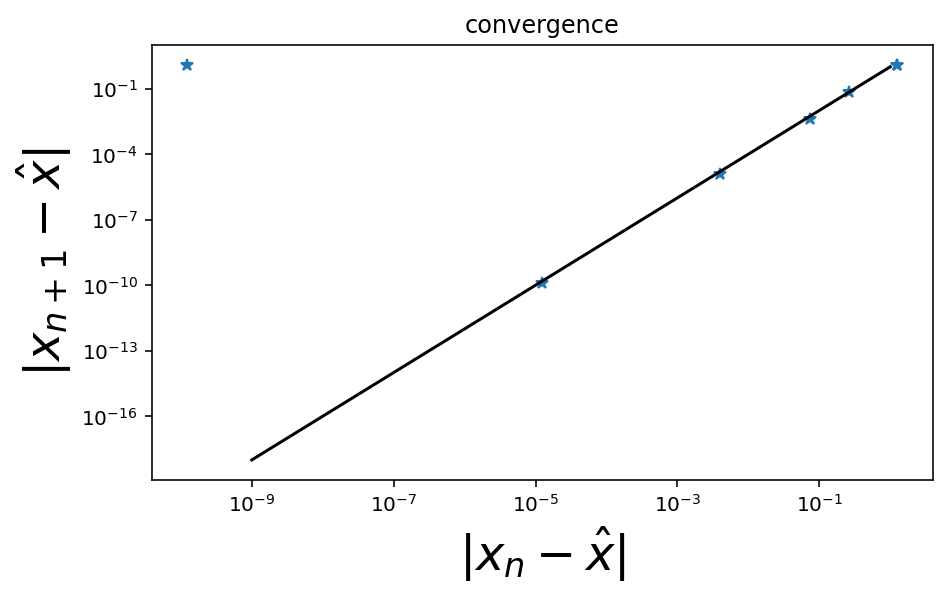

In [90]:
Nsteps = 8
x0=1.0
xhat=2**(1/3)
x = zeros(Nsteps)
x[0] = x0
e=10e-8
def f(x):
    return x**3-2
def g(x):
    return 3*x**2
ctr=0
for j in arange(Nsteps-1):
    x[j+1] = x[j] - f(x[j])/g(x[j])
    ctr=ctr+1
    if abs(f(x[j+1]))<1e-8:
        break
xN=x[ctr]
print(xN)
## Convergence plot
figure(1, [7, 4])
err = absolute(x - xhat)
loglog(err[:-1], err[1:], '*') ## plot the iterates of bisection
err_plot = array([1e-9, 1e-6, 1e-1, 1.])
loglog(err_plot, conv, 'k')
xlabel(r'$\vert x_n - \hat{x}\vert$', fontsize=24) ## x axis label
ylabel(r'$\vert x_{n+1} - \hat{x}\vert$', fontsize=24) ## y axis label
title('convergence');

# Question 3
Consider the function
$$ g(x) = \tan^{-1}(x) - x, $$
which has a single root $\hat{x}=0$.

# A
Use Newton's method to solve for the root using the initial guess $x_0 = 0.1$. How many iterations are required before the solution ceases to change? What is the absolute error once the iteration converges? Note that the Python function for $\tan^{-1}(x)$ is `arctan()`.

# B
You should notice that the absolute error found in part A is approximately $10^{-8}$, which means that the solution has roughly 8 digits of accuracy. This is half the number of digits of accuracy that we should expect using `float64` numbers. The reason is that $g'(0) = 0$. In addition to causing Newton's method to converge linearly, a repeated root makes the method more sensitive to rounding error.

Let us model the effect of rounding error for a typical case of root finding (where we do **not** have a repeated root like in part A). Suppose that due to rounding error, we are solving the perturbed problem 
$$ f(x) - \epsilon = 0 ,$$
where $\epsilon = 10^{-16}$ and represents machine epsilon for `float64` numbers. For simplicity, assume that there is a single root of the function $f$ at $\hat{x}=0$. Compute a Taylor series expansion of $f(x)$ around $x=0$ and assume that $f'(0) \neq 0$. Using the Taylor series expansion of $f$, derive an approximation to the solution to $f(x) - \epsilon = 0$. *Hint: your solution should be of the form $\hat{x}(\epsilon) = C\epsilon + O(\epsilon^2)$. You need to determine the constant $C$.*


# C [Extra Credit]
Repeat part B, but now assume that $f'(0) = 0$ and $f''(0) \neq 0$. *Hint: your solution should be of the form $\hat{x}(\epsilon) = M\epsilon^{1/2} + O(\epsilon)$.*


In [35]:
xhat=0.0
def f(x):
    return arctan(x)-x
def g(x):
    return 1/(1+x**2)-1
def newton(xCurr):
    condition=True
    ctr=1
    while condition:
        xNew=xCurr-f(xCurr)/g(xCurr)
        xCurr=xNew
        ctr=ctr+1
        if f(xCurr)==0:
            condition=False
    print(ctr)
    return xCurr

xN=newton(0.1)
abs_err=abs(xN-xhat)
print(abs(xN-xhat))

40
1.3422245858040224e-08
